In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = Ridge()

# 2. Setup Pipeline

In [4]:
poly = PolynomialFeatures()
pca=PCA()
SLR = Model_1

In [5]:
# Step 1: Polynomial transform
# Step 2: PCA
# Step 3: Model
pipe = Pipeline(steps=[("poly",poly),("pca",pca),("SLR",SLR)])

In [6]:
param_grid = {
    "pca__n_components": [45, 100 ,150 ,170],
    "poly__degree":[1,2],
    "SLR__alpha":[0.1,0.5,8,10,100]
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('pca', PCA()), ('SLR', Ridge())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.1, 0.5, 8, 10, 100],
                         'pca__n_components': [45, 100, 150, 170],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.757):
{'SLR__alpha': 100, 'pca__n_components': 150, 'poly__degree': 1}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,param_poly__degree,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
38,0.624432,0.163767,0.068716,0.070220,100,170,1,"{'SLR__alpha': 100, 'pca__n_components': 170, ...",-0.557192,-0.551972,...,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,1
36,0.526493,0.051148,0.059640,0.057453,100,150,1,"{'SLR__alpha': 100, 'pca__n_components': 150, ...",-0.557192,-0.551972,...,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,1
22,0.566416,0.072296,0.048441,0.057640,8,170,1,"{'SLR__alpha': 8, 'pca__n_components': 170, 'p...",-0.513021,-0.547673,...,-0.619544,-0.686219,-0.546546,-0.564497,-0.565643,-0.640100,-0.603677,-0.756829,0.510501,3
20,0.535774,0.117249,0.064259,0.082828,8,150,1,"{'SLR__alpha': 8, 'pca__n_components': 150, 'p...",-0.513021,-0.547673,...,-0.619544,-0.686219,-0.546546,-0.564497,-0.565643,-0.640100,-0.603677,-0.756829,0.510501,3
28,0.478122,0.195480,0.067557,0.065757,10,150,1,"{'SLR__alpha': 10, 'pca__n_components': 150, '...",-0.514352,-0.546784,...,-0.620699,-0.686463,-0.546698,-0.563997,-0.566899,-0.640761,-0.602906,-0.756855,0.509700,5
30,0.536267,0.088417,0.023537,0.039703,10,170,1,"{'SLR__alpha': 10, 'pca__n_components': 170, '...",-0.514352,-0.546784,...,-0.620699,-0.686463,-0.546698,-0.563997,-0.566899,-0.640761,-0.602906,-0.756855,0.509700,5
12,0.451895,0.072635,0.076544,0.082793,0.5,150,1,"{'SLR__alpha': 0.5, 'pca__n_components': 150, ...",-0.507700,-0.553135,...,-0.616896,-0.685685,-0.547066,-0.565729,-0.561473,-0.638818,-0.609361,-0.756957,0.511264,7
14,0.594481,0.102739,0.064624,0.070274,0.5,170,1,"{'SLR__alpha': 0.5, 'pca__n_components': 170, ...",-0.507700,-0.553135,...,-0.616896,-0.685685,-0.547066,-0.565729,-0.561473,-0.638818,-0.609361,-0.756957,0.511264,8
4,0.137732,0.028894,0.014362,0.008322,0.1,150,1,"{'SLR__alpha': 0.1, 'pca__n_components': 150, ...",-0.507356,-0.553718,...,-0.617224,-0.685505,-0.547267,-0.565382,-0.561329,-0.641078,-0.610051,-0.757183,0.510955,9
6,0.188895,0.032970,0.017454,0.012021,0.1,170,1,"{'SLR__alpha': 0.1, 'pca__n_components': 170, ...",-0.507356,-0.553718,...,-0.617224,-0.685505,-0.547267,-0.565382,-0.561329,-0.641078,-0.610051,-0.757183,0.510955,10


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 100, 'pca__n_components': 170, 'poly__degree': 1}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_degree=parms.iloc[0][0]['poly__degree']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [13]:
Model_2 = Ridge(alpha=best_alpha)

In [14]:
poly1 = PolynomialFeatures(degree=best_degree)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:
pca1 = PCA(n_components=best_pca)
X_train1 = poly1.fit_transform(X_train1)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

Ridge(alpha=100)

In [17]:
pca2 = PCA(n_components=best_pca)
X_test1=poly1.fit_transform(X_test1)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [18]:
MSE(SLR1.predict(PX_test1),Y_test1)

2.061426182623276

In [19]:
result = pd.DataFrame(np.exp(Y_test1))

In [20]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [21]:
MSE(result["sales"],result["Predicted_sales"])

1195.1841411090666

# 5.1 Model using original sales data

In [22]:
Model_3 = Ridge(alpha=best_alpha)

In [23]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
pca3 = PCA(n_components=best_pca)
X_train2 = poly1.fit_transform(X_train2)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

Ridge(alpha=100)

In [26]:
pca4 = PCA(n_components=best_pca)
X_test2=poly1.fit_transform(X_test2)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [27]:
MSE(SLR2.predict(PX_test2),Y_test2)

1807.7790377974325

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [28]:
residual = result['sales']-result['Predicted_sales']

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [30]:
import scipy.stats as sct

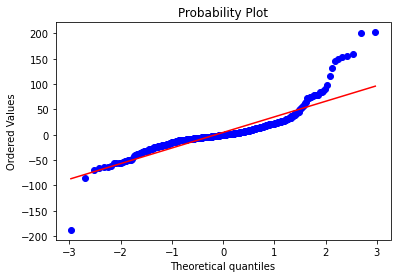

In [31]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [32]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

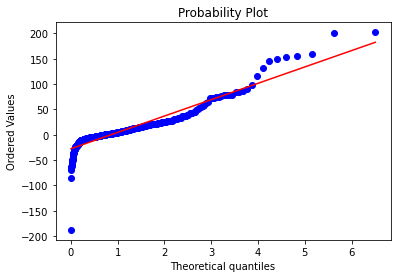

In [33]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [34]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

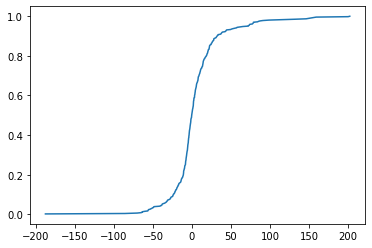

In [35]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

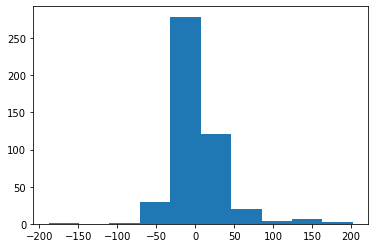

In [36]:
plt.hist(Sample)
plt.show()

In [37]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [38]:
offset = inv(Sample,jumps,2/3)
offset

6.873599945590659

In [39]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [40]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [41]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

22076.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

22240.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

24812.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4=Ridge(alpha=best_alpha)

In [46]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    X_train_K = poly1.fit_transform(X_train_K)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    X_test_K=poly1.fit_transform(X_test_K)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(SLR_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [47]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.142181,0.235107,-0.075082,0.232017,0.106527,0.168203,0.004003,0.225065,0.238815,0.044468,0.132130
Exponential,0.116857,0.212834,-0.151460,0.209785,0.093392,0.131018,-0.038474,0.182654,0.208572,0.026988,0.099217
Empirical,0.165668,0.260916,-0.067911,0.248155,0.129412,0.198422,0.022382,0.235386,0.252237,0.079716,0.152438


In [48]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,5884.0,10640.0,-3476.0,10812.0,5288.0,6568.0,196.0,10380.0,10676.0,1852.0,5882.0,4765.763318
Exponential,4836.0,9632.0,-7012.0,9776.0,4636.0,5116.0,-1884.0,8424.0,9324.0,1124.0,4397.2,5271.873458
Empirical,6856.0,11808.0,-3144.0,11564.0,6424.0,7748.0,1096.0,10856.0,11276.0,3320.0,6780.4,4783.617861
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [49]:
profit_table.to_csv(".\\Model_Selection_Result\\2.5_Poly_reg_ridge.csv")